<a href="https://colab.research.google.com/github/Shashvat207/Data_Science_Salaries/blob/main/Data_Science_Salaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("/content/ds_salaries.csv")

In [3]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [4]:
data.drop(columns=["salary","salary_currency"],inplace=True)

In [5]:
data.shape

(3755, 9)

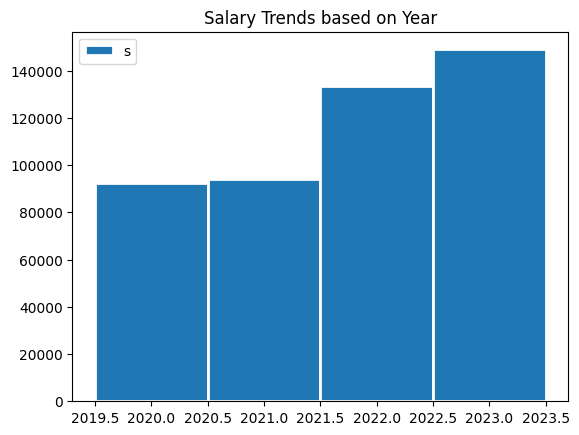

In [6]:
salary=[]
year=[]
for i in range(2020,2024):
    salary.append(data[data["work_year"]==i]["salary_in_usd"].mean())
    year.append(i)
plt.title("Salary Trends based on Year")
plt.bar(year,salary,linewidth=2,width=1,edgecolor="white")
plt.legend("salary")
plt.show()

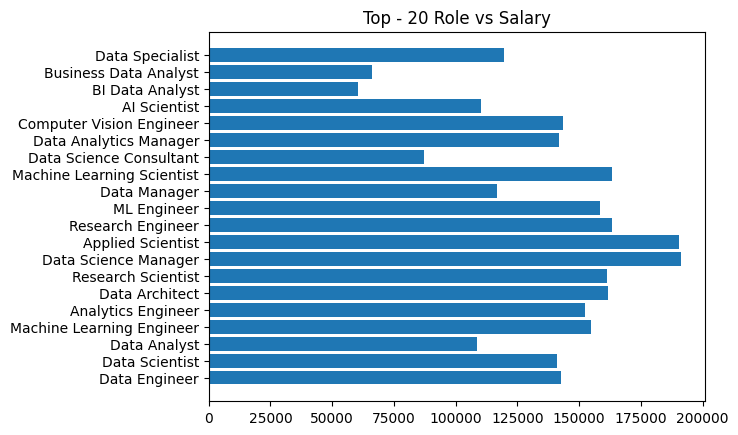

<Figure size 2000x2000 with 0 Axes>

In [7]:
data[data["job_title"]=="Data Engineer"]["salary_in_usd"].mean()
job=data["job_title"].value_counts().head(20)
job_title=[]
mean_job_salary=[]
for i in job.index:
    job_title.append(i)
    mean_job_salary.append(data[data["job_title"]==i]["salary_in_usd"].mean())

plt.title("Top - 20 Role vs Salary")
plt.barh(job_title,mean_job_salary,)
plt.figure(figsize=(20,20))
plt.show()

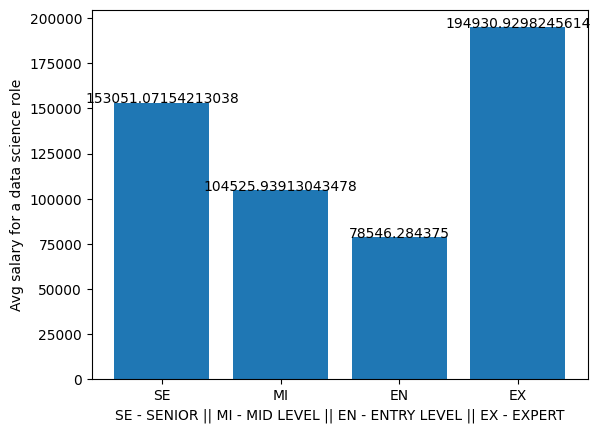

<Figure size 2000x1000 with 0 Axes>

In [8]:
data["experience_level"].value_counts().index
exp_index=[]
exp_sal=[]
for i in data["experience_level"].value_counts().index:
    exp_index.append(i)
    exp_sal.append(data[data["experience_level"]==i]["salary_in_usd"].mean())
for i, v in enumerate(exp_sal):
    plt.text(i, v + 0.5, str(v), ha='center')
plt.xlabel("SE - SENIOR || MI - MID LEVEL || EN - ENTRY LEVEL || EX - EXPERT")
plt.bar(exp_index,exp_sal)
plt.ylabel("Avg salary for a data science role")
plt.figure(figsize=(20,10))

plt.show()

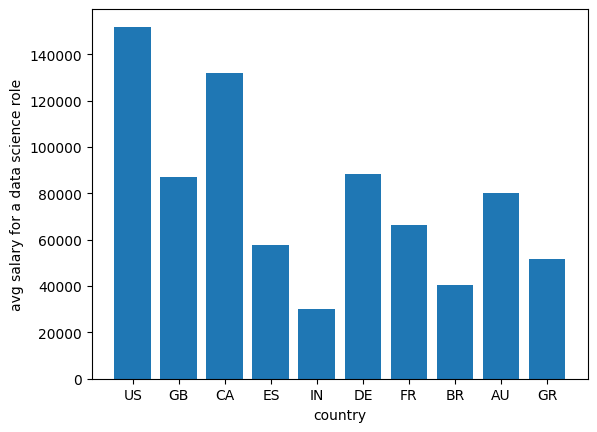

In [9]:
loc=data["company_location"].value_counts().head(10)
con=[]
con_sal=[]
for i in loc.index:
    con.append(i)
    con_sal.append(data[data["company_location"]==i]["salary_in_usd"].mean())
plt.bar(con,con_sal)
plt.xlabel("country")
plt.ylabel("avg salary for a data science role")
plt.show()

In [10]:
data["work_type"]=data["remote_ratio"].replace({0:"in-office",100:"fully remote",50:"hybrid"})

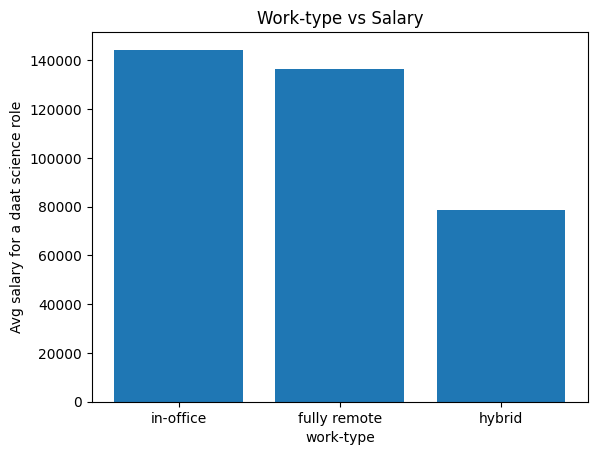

In [11]:
work_type=[]
work_sal=[]
for i in data["work_type"].value_counts().index:
    work_type.append(i)
    work_sal.append(data[data["work_type"]==i]["salary_in_usd"].mean())
plt.bar(work_type,work_sal)
plt.title("Work-type vs Salary")
plt.xlabel("work-type")
plt.ylabel("Avg salary for a daat science role")
plt.show()

In [12]:
data.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,work_type
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L,fully remote
1,2023,MI,CT,ML Engineer,30000,US,100,US,S,fully remote
2,2023,MI,CT,ML Engineer,25500,US,100,US,S,fully remote
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M,fully remote
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M,fully remote


In [18]:
data.drop(["employee_residence"],axis=1,inplace=True)

In [19]:
data

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size,work_type
0,2023,SE,FT,Principal Data Scientist,85847,100,ES,L,fully remote
1,2023,MI,CT,ML Engineer,30000,100,US,S,fully remote
2,2023,MI,CT,ML Engineer,25500,100,US,S,fully remote
3,2023,SE,FT,Data Scientist,175000,100,CA,M,fully remote
4,2023,SE,FT,Data Scientist,120000,100,CA,M,fully remote
...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,100,US,L,fully remote
3751,2021,MI,FT,Principal Data Scientist,151000,100,US,L,fully remote
3752,2020,EN,FT,Data Scientist,105000,100,US,S,fully remote
3753,2020,EN,CT,Business Data Analyst,100000,100,US,L,fully remote


In [31]:
mean=data["salary_in_usd"].mean()

In [32]:
std=data["salary_in_usd"].std()

In [28]:
data["salary_in_usd"].max()

450000

In [29]:
137570+3*63055

326735

In [38]:
data=data[data["salary_in_usd"]>mean-3*std]
data=data[data["salary_in_usd"]<mean+3*std]

In [39]:
data.shape

(3733, 9)

In [40]:
data.isnull().sum()

work_year           0
experience_level    0
employment_type     0
job_title           0
salary_in_usd       0
remote_ratio        0
company_location    0
company_size        0
work_type           0
dtype: int64

In [46]:
data["job_title"].value_counts()

Data Engineer                          1040
Data Scientist                          837
Data Analyst                            610
Machine Learning Engineer               288
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Marketing Data Engineer                   1
Manager Data Management                   1
Finance Data Analyst                      1
Name: job_title, Length: 92, dtype: int64